In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

## 1. Exploring data

In [2]:
import zipfile

with zipfile.ZipFile("dob_job_application_filings_subset.csv.zip") as z:
    with z.open("dob_job_application_filings_subset.csv") as f:
# Read the file into a DataFrame: df
        df = pd.read_csv(f, low_memory=False)

# Print the shape of df
df.shape

(12846, 82)

In [3]:
# Print the columns of df
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [4]:
# Print the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [5]:
# Print the value counts for 'Borough'
df['Borough'].value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [6]:
# Describe the column
df['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

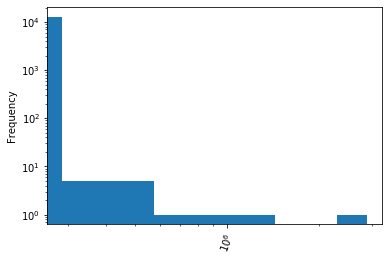

In [7]:
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

## 2. Reshaping data with pd.melt and pd.pivot_table

In [8]:
airquality = pd.read_csv('airquality.csv')
airquality.head()

Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5

In [9]:
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
airquality_melt.head()

Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN

In [10]:
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
airquality_pivot.columns.name = ''
airquality_pivot.head()

Month  Day  Ozone  Solar.R  Temp  Wind
0      5    1   41.0    190.0  67.0   7.4
1      5    2   36.0    118.0  72.0   8.0
2      5    3   12.0    149.0  74.0  12.6
3      5    4   18.0    313.0  62.0  11.5
4      5    5    NaN      NaN  56.0  14.3

## 3. Combining data with pd.concat

In [11]:
# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
csv_files

['airquality.csv',
 'gapminder_melt.csv',
 'nyc_uber_2014.csv',
 'tips.csv',
 'ebola.csv',
 'tb.csv',
 'gapminder.csv',
 'gapminder_agg.csv']

In [12]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames, sort=False)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
uber.head()

(45870, 273)


Ozone  Solar.R  Wind  Temp  Month  Day  Unnamed: 0 country  year  \
0   41.0    190.0   7.4  67.0    5.0  1.0         NaN     NaN   NaN   
1   36.0    118.0   8.0  72.0    5.0  2.0         NaN     NaN   NaN   
2   12.0    149.0  12.6  74.0    5.0  3.0         NaN     NaN   NaN   
3   18.0    313.0  11.5  62.0    5.0  4.0         NaN     NaN   NaN   
4    NaN      NaN  14.3  56.0    5.0  5.0         NaN     NaN   NaN   

   life_expectancy  ... 2009  2010  2011 2012  2013  2014 2015 2016  \
0              NaN  ...  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   
1              NaN  ...  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   
2              NaN  ...  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   
3              NaN  ...  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   
4              NaN  ...  NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   

  Life expectancy 31.48601990049751  
0             NaN               NaN  
1             NaN               NaN  
2             NaN               NaN  
3             NaN               NaN  
4             NaN               NaN  

[5 rows x 273 columns]

## 4. Cleaning data for analysis

In [13]:
tips = pd.read_csv('tips.csv')
tips.sample(5)

total_bill   tip     sex smoker   day    time  size
155       29.85  5.14  Female     No   Sun  Dinner     5
157       25.00  3.75  Female     No   Sun  Dinner     4
89        21.16  3.00    Male     No  Thur   Lunch     2
228       13.28  2.72    Male     No   Sat  Dinner     2
61        13.81  2.00    Male    Yes   Sat  Dinner     2

### Converting data types

In [14]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


In [15]:
 # Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors = 'coerce')

# Print the info of tips
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


In [16]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips['sex'].apply(recode_gender)

# Print the first five rows of tips
tips.head()


total_bill   tip     sex smoker  day    time  size recode
0       16.99  1.01  Female     No  Sun  Dinner     2      0
1       10.34  1.66    Male     No  Sun  Dinner     3      1
2       21.01  3.50    Male     No  Sun  Dinner     3      1
3       23.68  3.31    Male     No  Sun  Dinner     2      1
4       24.59  3.61  Female     No  Sun  Dinner     4      0

### Dropping duplicate data

In [17]:
tips.duplicated().sum()

1

In [18]:
tips = tips.drop_duplicates()
tips.duplicated().sum()

0

### Filling missing data

In [19]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality['Ozone'].mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


Reference

[Daniel Chen: Cleaning Data in Python](https://www.datacamp.com/courses/cleaning-data-in-python)